In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
phm_folder= "../datasets/phm-2012-wt/"

motor = 'Bearing1_2'

path_X_train_Bearing1_1 = phm_folder+'X_train_'+motor+'.npy' 
# path_X_train_Bearing1_2 = phm_folder+'X_train_Bearing1_2.npy'
# path_X_train_Bearing2_1 = phm_folder+'X_train_Bearing2_1.npy' 
# path_X_train_Bearing2_2 = phm_folder+'X_train_Bearing2_2.npy' 
# path_X_train_Bearing3_1 = phm_folder+'X_train_Bearing3_1.npy' 
# path_X_train_Bearing3_2 = phm_folder+'X_train_Bearing3_2.npy' 


path_Y_train_Bearing1_1 = phm_folder+'Y_train_'+motor+'.npy' 
# path_Y_train_Bearing1_2 = phm_folder+'Y_train_Bearing1_2.npy'
# path_Y_train_Bearing2_1 = phm_folder+'Y_train_Bearing2_1.npy' 
# path_Y_train_Bearing2_2 = phm_folder+'Y_train_Bearing2_2.npy' 
# path_Y_train_Bearing3_1 = phm_folder+'Y_train_Bearing3_1.npy' 
# path_Y_train_Bearing3_2 = phm_folder+'Y_train_Bearing3_2.npy' 

In [3]:
X_train_Bearing1_1 = np.load(path_X_train_Bearing1_1)
# X_train_Bearing1_2 = np.load(path_X_train_Bearing1_2)
# X_train_Bearing2_1 = np.load(path_X_train_Bearing2_1)
# X_train_Bearing2_2 = np.load(path_X_train_Bearing2_2)
# X_train_Bearing3_1 = np.load(path_X_train_Bearing3_1)
# X_train_Bearing3_2 = np.load(path_X_train_Bearing3_2)

Y_train_Bearing1_1 = np.load(path_Y_train_Bearing1_1)
# Y_train_Bearing1_2 = np.load(path_Y_train_Bearing1_2)
# Y_train_Bearing2_1 = np.load(path_Y_train_Bearing2_1)
# Y_train_Bearing2_2 = np.load(path_Y_train_Bearing2_2)
# Y_train_Bearing3_1 = np.load(path_Y_train_Bearing3_1)
# Y_train_Bearing3_2 = np.load(path_Y_train_Bearing3_2)

In [4]:
# from keras.datasets import mnist  
# from keras.utils import np_utils  
# import numpy as np  
# np.random.seed(10)  
  
# # Read MNIST data  
# (X_train, y_train), (X_Test, y_Test) = mnist.load_data()  

# num_pixels=28*28
# X_train = X_train.reshape(X_train.shape[0], num_pixels)

In [5]:
ratio = 0.5
Y_train = Y_train_Bearing1_1
# Y_train = Y_train_Bearing1_1 + ratio
# Y_train = np.floor(Y_train)

X_train = np.squeeze(X_train_Bearing1_1, axis=1)

num_pixels=511*99
X_train = X_train.reshape(X_train.shape[0], num_pixels)

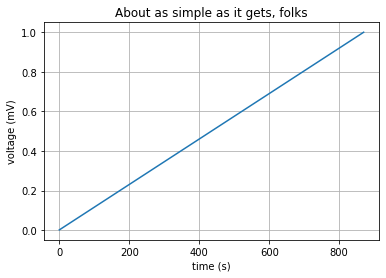

In [6]:
fig, ax = plt.subplots()
ax.plot(Y_train)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')

ax.grid()

plt.show()

In [7]:
# model = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=50, n_iter=2500)
model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000)
reduced_data = model.fit_transform(X_train)

In [8]:
reduced_pd = pd.DataFrame(reduced_data)
reduced_df = np.vstack((reduced_data.T, Y_train)).T
reduced_df = pd.DataFrame(data=reduced_df, columns=["X", "Y", "Y_train"])
reduced_df.Y_train = reduced_df.Y_train.astype(np.float)
reduced_df.head()

,X,Y,Y_train
0,31.241962,-8.576574,0.001148
1,1.826257,-18.664473,0.002296
2,21.487629,-13.550390,0.003444
3,34.365017,-1.692750,0.004592
4,17.479860,-9.266703,0.005741


In [14]:
plot_df_c0 = reduced_df[reduced_df['Y_train']<0.3]
plot_df_c1 = reduced_df[(reduced_df['Y_train']>0.3) & (reduced_df['Y_train']<0.9)]
plot_df_c2 = reduced_df[reduced_df['Y_train']> 0.9]

# (reduced_df['Y_train']>0.3) & (reduced_df['Y_train']<0.6)

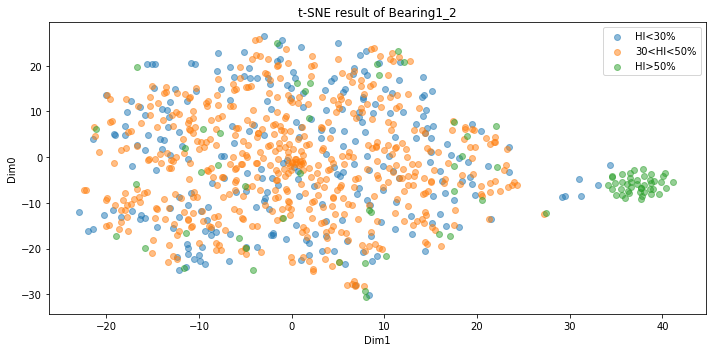

In [15]:
# reduced_pd = pd.DataFrame(reduced_data)
# reduced_pd
plt.figure(figsize=(10, 5))
plt.scatter(plot_df_c0['X'], plot_df_c0['Y'], alpha=0.5, label='HI<30%')
plt.scatter(plot_df_c1['X'], plot_df_c1['Y'], alpha=0.5, label='30<HI<50%')
plt.scatter(plot_df_c2['X'], plot_df_c2['Y'], alpha=0.5, label='HI>50%')

plt.title('t-SNE result of '+ motor)
plt.ylabel('Dim0')
plt.xlabel('Dim1')
plt.tight_layout()
plt.legend()
plt.savefig('tsne_'+motor+'.png', dpi=300)
plt.show()

In [11]:
def plot_tsne (x, y, model):
    
    g = sns.FacetGrid(reduced_df, hue='Y_train', size=6).map(plt.scatter, 'X', 'Y').add_legend()